In [1]:
from preprocessing import *
import preprocessing as prp
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as data_utils
from usad import *

In [3]:
dataframe = pd.read_csv(r"/home/medoro/Unsupervised_Anomaly_Detection_thesis/data/train.csv")
dataframe.shape

(1749494, 57)

In [5]:
df=dataframe[['building_id','primary_use', 'timestamp', 'meter_reading', 'sea_level_pressure', 'is_holiday','anomaly']]
df

,building_id,primary_use,timestamp,meter_reading,sea_level_pressure,is_holiday,anomaly
0,1,Education,2016-01-01 00:00:00,NaN,967.2,1,0
1,32,Office,2016-01-01 00:00:00,NaN,967.2,1,0
2,41,Office,2016-01-01 00:00:00,NaN,967.2,1,0
3,55,Office,2016-01-01 00:00:00,NaN,967.2,1,0
4,69,Parking,2016-01-01 00:00:00,NaN,967.2,1,0
...,...,...,...,...,...,...,...
1749489,1316,Entertainment/public assembly,2016-12-31 23:00:00,38.844,967.2,0,0
1749490,1318,Entertainment/public assembly,2016-12-31 23:00:00,202.893,967.2,0,0
1749491,1319,Entertainment/public assembly,2016-12-31 23:00:00,NaN,967.2,0,0
1749492,1323,Office,2016-12-31 23:00:00,172.000,967.2,0,0


In [6]:
imputed_df = impute_nulls(df)
imputed_df

,building_id,primary_use,timestamp,meter_reading,sea_level_pressure,is_holiday,anomaly
0,1,Education,2016-01-01 00:00:00,31.477940,967.2,1,0
200,1,Education,2016-01-01 01:00:00,29.582970,1019.4,1,0
398,1,Education,2016-01-01 02:00:00,28.635485,1018.8,1,0
597,1,Education,2016-01-01 03:00:00,28.161742,1018.1,1,0
796,1,Education,2016-01-01 04:00:00,27.924871,1019.0,1,0
...,...,...,...,...,...,...,...
1748693,1353,Religious worship,2016-12-31 19:00:00,2.425000,967.2,0,0
1748893,1353,Religious worship,2016-12-31 20:00:00,2.450000,967.2,0,0
1749093,1353,Religious worship,2016-12-31 21:00:00,2.425000,967.2,0,0
1749293,1353,Religious worship,2016-12-31 22:00:00,2.450000,967.2,0,0


Now that we have imputed the missing values for the column containing the energy consumption measurements, we can procees by adding a couple of features more and further imputing the missing dates for each timeseries in the dataset.

In [7]:
df = add_trigonometric_features(imputed_df)
df

,building_id,primary_use,timestamp,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
0,1,Education,2016-01-01 00:00:00,31.477940,967.2,1,0,4,-0.433884,-0.900969
200,1,Education,2016-01-01 01:00:00,29.582970,1019.4,1,0,4,-0.433884,-0.900969
398,1,Education,2016-01-01 02:00:00,28.635485,1018.8,1,0,4,-0.433884,-0.900969
597,1,Education,2016-01-01 03:00:00,28.161742,1018.1,1,0,4,-0.433884,-0.900969
796,1,Education,2016-01-01 04:00:00,27.924871,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...
1748693,1353,Religious worship,2016-12-31 19:00:00,2.425000,967.2,0,0,5,-0.974928,-0.222521
1748893,1353,Religious worship,2016-12-31 20:00:00,2.450000,967.2,0,0,5,-0.974928,-0.222521
1749093,1353,Religious worship,2016-12-31 21:00:00,2.425000,967.2,0,0,5,-0.974928,-0.222521
1749293,1353,Religious worship,2016-12-31 22:00:00,2.450000,967.2,0,0,5,-0.974928,-0.222521


In [8]:
dfs_dict = impute_missing_dates(df)

/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:76: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_index = pd.date_range(start_ts, end=end_ts, freq="1H")


In [9]:
dfs_dict

{1:                      building_id primary_use  meter_reading  \
 2016-01-01 00:00:00            1   Education      31.477940   
 2016-01-01 01:00:00            1   Education      29.582970   
 2016-01-01 02:00:00            1   Education      28.635485   
 2016-01-01 03:00:00            1   Education      28.161742   
 2016-01-01 04:00:00            1   Education      27.924871   
 ...                          ...         ...            ...   
 2016-12-31 19:00:00            1   Education      20.006000   
 2016-12-31 20:00:00            1   Education      15.364000   
 2016-12-31 21:00:00            1   Education      15.685000   
 2016-12-31 22:00:00            1   Education      15.925000   
 2016-12-31 23:00:00            1   Education      14.964000   
 
                      sea_level_pressure  is_holiday  anomaly  weekday  \
 2016-01-01 00:00:00               967.2           1        0        4   
 2016-01-01 01:00:00              1019.4           1        0        4   
 2016

In [10]:
df1 = pd.concat(dfs_dict.values())
df1

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
2016-01-01 00:00:00,1,Education,31.477940,967.2,1,0,4,-0.433884,-0.900969
2016-01-01 01:00:00,1,Education,29.582970,1019.4,1,0,4,-0.433884,-0.900969
2016-01-01 02:00:00,1,Education,28.635485,1018.8,1,0,4,-0.433884,-0.900969
2016-01-01 03:00:00,1,Education,28.161742,1018.1,1,0,4,-0.433884,-0.900969
2016-01-01 04:00:00,1,Education,27.924871,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1353,Religious worship,2.425000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 20:00:00,1353,Religious worship,2.450000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 21:00:00,1353,Religious worship,2.425000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 22:00:00,1353,Religious worship,2.450000,967.2,0,0,5,-0.974928,-0.222521


Let's now obtain the train and validation set. We are going to split the dataset into 2 sets, according to the building id.

In [11]:
dfs_train, dfs_val = train_val_split(df1)
train = pd.concat(dfs_train.values())

In [12]:
val = pd.concat(dfs_val.values())

In [13]:
train

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
2016-01-01 00:00:00,1,Education,31.477940,967.2,1,0,4,-0.433884,-0.900969
2016-01-01 01:00:00,1,Education,29.582970,1019.4,1,0,4,-0.433884,-0.900969
2016-01-01 02:00:00,1,Education,28.635485,1018.8,1,0,4,-0.433884,-0.900969
2016-01-01 03:00:00,1,Education,28.161742,1018.1,1,0,4,-0.433884,-0.900969
2016-01-01 04:00:00,1,Education,27.924871,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1353,Religious worship,2.425000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 20:00:00,1353,Religious worship,2.450000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 21:00:00,1353,Religious worship,2.425000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 22:00:00,1353,Religious worship,2.450000,967.2,0,0,5,-0.974928,-0.222521


In [14]:
val

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
2016-01-01 00:00:00,69,Parking,19.232375,967.2,1,0,4,-0.433884,-0.900969
2016-01-01 01:00:00,69,Parking,13.457187,1019.4,1,0,4,-0.433884,-0.900969
2016-01-01 02:00:00,69,Parking,10.569594,1018.8,1,0,4,-0.433884,-0.900969
2016-01-01 03:00:00,69,Parking,9.125797,1018.1,1,0,4,-0.433884,-0.900969
2016-01-01 04:00:00,69,Parking,8.403898,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 20:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 21:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 22:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521


In [15]:
train_window = 168

In [16]:
X, y = split_sequences(train, train_window)

In [17]:
X, y

(array([[[0.60893402],
         [0.54943545],
         [0.51968617],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.54943545],
         [0.51968617],
         [0.50481153],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.51968617],
         [0.50481153],
         [0.49737421],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        ...,
 
        [[0.3942953 ],
         [0.07214765],
         [0.08389262],
         ...,
         [0.08389262],
         [0.07214765],
         [0.0738255 ]],
 
        [[0.07214765],
         [0.08389262],
         [0.07214765],
         ...,
         [0.07214765],
         [0.0738255 ],
         [0.07214765]],
 
        [[0.08389262],
         [0.07214765],
         [0.0738255 ],
         ...,
         [0.0738255 ],
         [0.07214765],
         [0.0738255 ]]]),
 array([0.48993689, 0.48993689, 0.48993689, ..., 0.0721

In [18]:
X.shape

(1395792, 168, 1)

In [19]:
y.shape

(1395792,)

In [37]:
BATCH_SIZE =  128
N_EPOCHS = 1
hidden_size = 1/8

In [25]:
w_size = X.shape[1] * X.shape[2]
z_size = X.shape[1] * hidden_size
w_size, z_size

(168, 21.0)

In [26]:
z_size = 21

In [27]:
import torch.utils.data as data_utils

In [38]:
train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X).float().view(([X.shape[0], w_size]))), batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)

In [39]:
X_val, y_val = split_sequences(val, train_window)

In [40]:
X_val.shape, y_val.shape

((327408, 168, 1), (327408,))

In [42]:
val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_val).float().view(([X_val.shape[0],w_size]))) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [43]:
model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [44]:
device

device(type='cuda')

In [35]:
! export CUDA_VISIBLE_DEVICES=2

In [45]:
history = training(N_EPOCHS,model,train_loader,val_loader) #2.43 min a epoch

Epoch [0], val_loss1: 0.0144, val_loss2: 0.0148


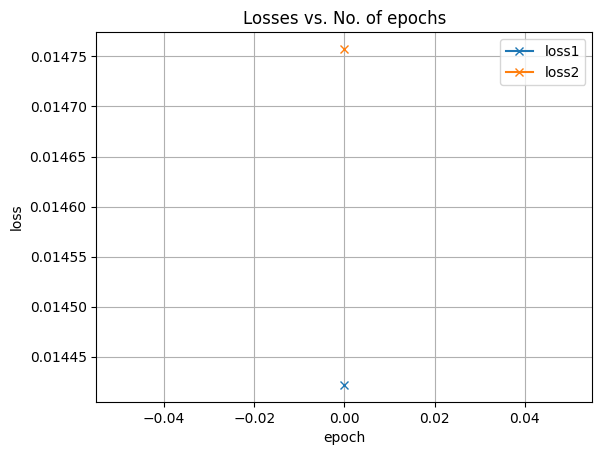

In [46]:
plot_history(history)

In [ ]:
# /home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints


In [48]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_test_save.pth")